In [1]:
import matplotlib.pyplot as plt
print("Matplotlib installed successfully!")



Matplotlib is building the font cache; this may take a moment.


Matplotlib installed successfully!


In [2]:
from transformers import GPT2LMHeadModel

import matplotlib.pyplot as plt

/Users/adityamxr/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/adityamxr/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") #124M parameter
sd_hf = model_hf.state_dict()

# get the tensors of the file
for k,v in sd_hf.items():
    print(k,v.shape)

# 50257 vocab size, 768 dimentional embedding (vectors that represent the words, or tokens)
# GPT2 has 1024 sequence length (and each token can embed to it, and every position has a fixed vector of 768 that is learned from 
# optimization)

# schema below!

# .h -> is indexed using number instead of using strings: .h0 till .h11, which indicates 12 layers 

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [9]:
# takes the positional embeddings and flattens it and takes the first 20, as you can see, these are the weights of the positional embeddings
sd_hf['transformer.wpe.weight'].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

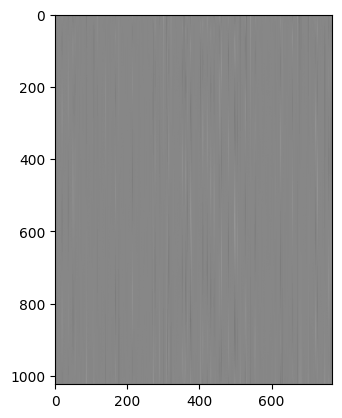

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot of positional embeddings - structure exists because every row is a different position (range 0 to 1024)
# positional embeddings end up learning the sinasoids and cosines that represent the position of the token in the sequence
# and each row stands in for the position and is processed by the transformer to recover all the relative positions and realize which token
# is where!
plt.imshow(sd_hf['transformer.wpe.weight'], cmap='gray')

Below, when we look at an individual column from the graph above, we'll see that the channels that are chosen, we are looking at 
what the channel is doing as a function of the position from 0-1024. And we can see some channels respond either more or less to different parts of the position spectrum (0-1024).

For example, the green channel likes to fire for everything after 200 and up to 800 and has a sharp dropoff at positions less than 50. The reason for this is unknown as the transformer architecture is a "black box model," or in other words, it is difficult to interpret precisely why certain channels activate at specific positions. However, we can hypothesize that these variations correspond to different token positions playing distinct roles in the model's learned representations.

For instance, channels that exhibit stronger activations in the earlier positions (e.g., <50) might correspond to tokens that serve as contextual markers, such as sentence beginnings or function words, while those that activate between 200 and 800 could correspond to more content-heavy words that form the bulk of meaningful text. The sharp drop-offs in certain channels suggest that specific positions influence the embeddings more than others, which could be an effect of learned attention mechanisms and the model's training dynamics.

Additionally, the presence of noise-like fluctuations in other channels could indicate the model was not fully trained, and the more trained the model was, the smoother the transitions would be. However, in principle, these curves dont have to be smooth and could serve as random noise because the positional embeddings table (or its representation as a graph above) is initialized completely at random. So in the beginning you have "jaggedness" and the fact that you have some noticeable smoothness is impressive. In the original "attention is all you need" paper, the positional embeddings were not random: they were "fixed" in a sinasoidal fashion. However, in the gpt2 implementation, these embeddings were random, yet the their representations below naturally arose to have sinasoidal features. 

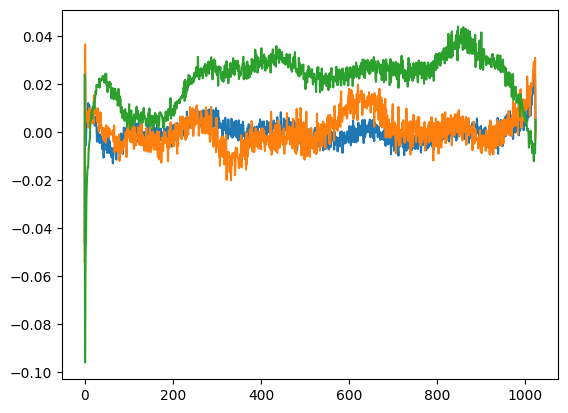

In [7]:
plt.plot(sd_hf['transformer.wpe.weight'][:,150])
plt.plot(sd_hf['transformer.wpe.weight'][:,200])
plt.plot(sd_hf['transformer.wpe.weight'][:,250])

In [12]:
from transformers import pipeline, set_seed 
generator = pipeline('text-generation', model ='gpt2')
set_seed(42)
generator("Hello, i'm a language model,", max_length = 30, num_return_sequences=5)

Device set to use mps:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, i'm a language model, i'm trying to get better with my game and i think i'm a little more understanding of those basics like"},
 {'generated_text': "Hello, i'm a language model, i'm able to express all of your functions in a single function, so if you don't know that,"},
 {'generated_text': "Hello, i'm a language model, i write Python, also my mom has a Python program that writes Ruby and Python. So I'm kind of"},
 {'generated_text': "Hello, i'm a language model, but i don't believe in grammar. This also means im a linguist. So no, my understanding of"},
 {'generated_text': "Hello, i'm a language model, it doesn't mean anything really, you can just apply it to other things as well and I think it's"}]

The weights have been loaded, now using the huggingface transformers, we not only get the raw weights, but also get the pipeline and sample from it as shown above. 30 tokens were sampled and 5 sentences were formed.